In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [8]:
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [9]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

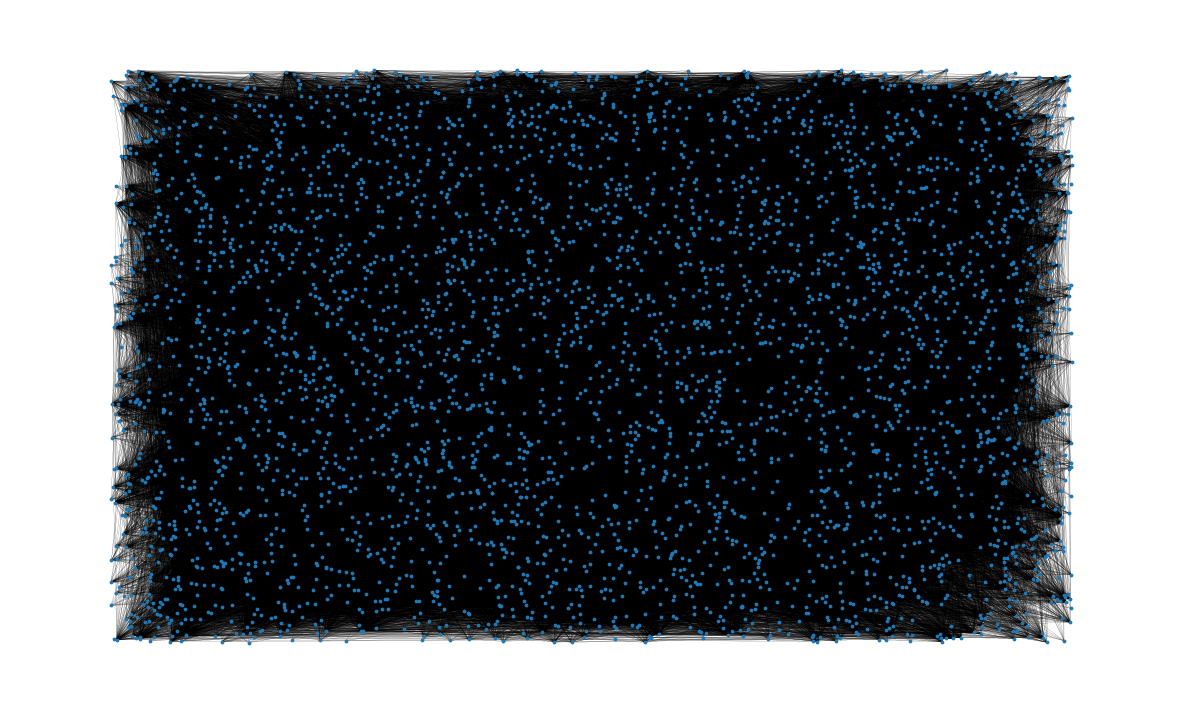

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 3, "with_labels": False, "width": 0.1}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

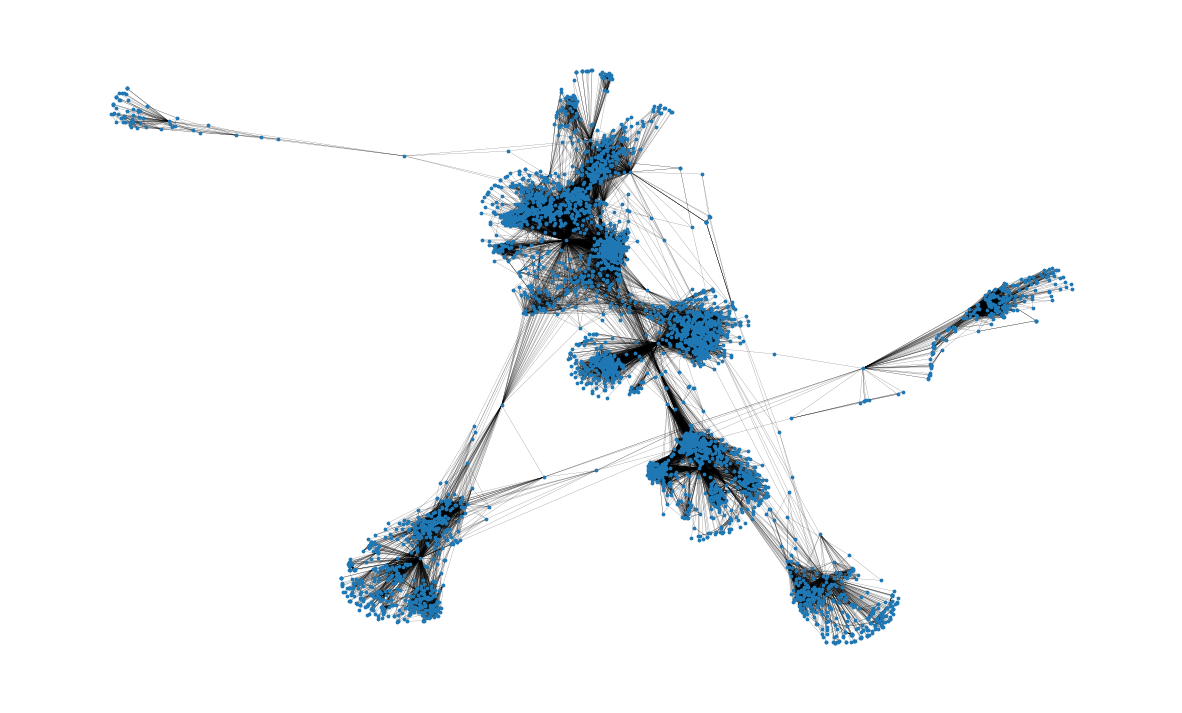

In [13]:
pos = nx.spring_layout(G, iterations=50) # тут покажем несколько графиков: 15, 30, 50, сделаем вывод
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

LPC (Label Propagation Communities) -- Алгоритм распространения меток

In [14]:
from random import randint

colors = ["" for x in range(G.number_of_nodes())]  # initialize colors list
counter = 0
for com in nx.community.asyn_lpa_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(com):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

73

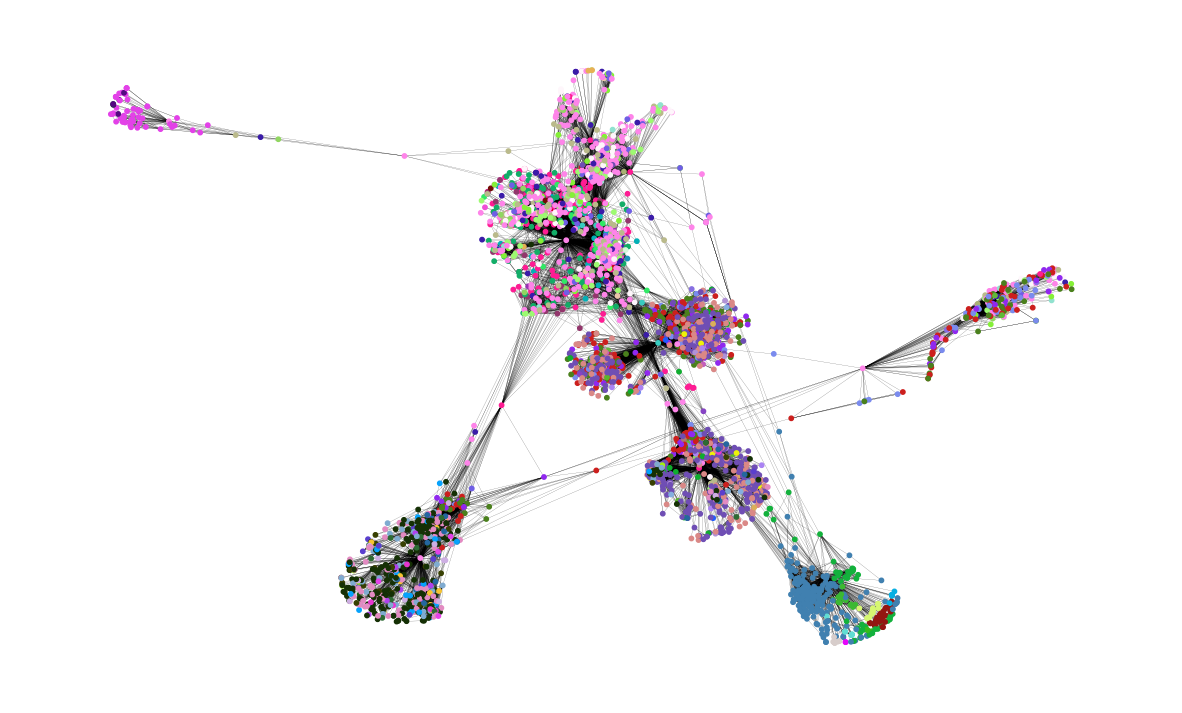

In [15]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.1, node_color=colors
)

Louvain Community Detection -- Алгоритм Лувина

In [16]:
counter = 0
for com in nx.community.louvain_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

16

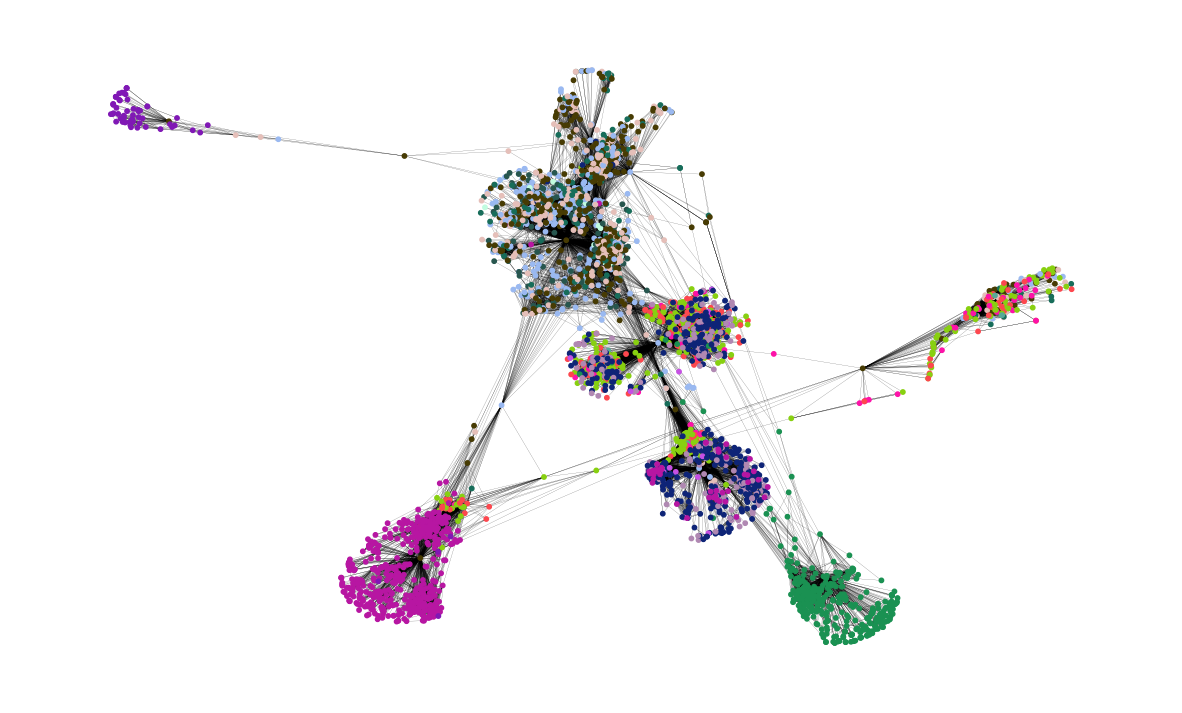

In [17]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.1, node_color=colors
)

Fluid Communities -- алгоритм подвижных сообществ

In [24]:
counter = 0
for com in nx.community.asyn_fluidc(G, 8):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    counter += 1
    for node in list(
        com
    ):  # fill colors list with the particular color for the community nodes
        colors[node] = color
counter

8

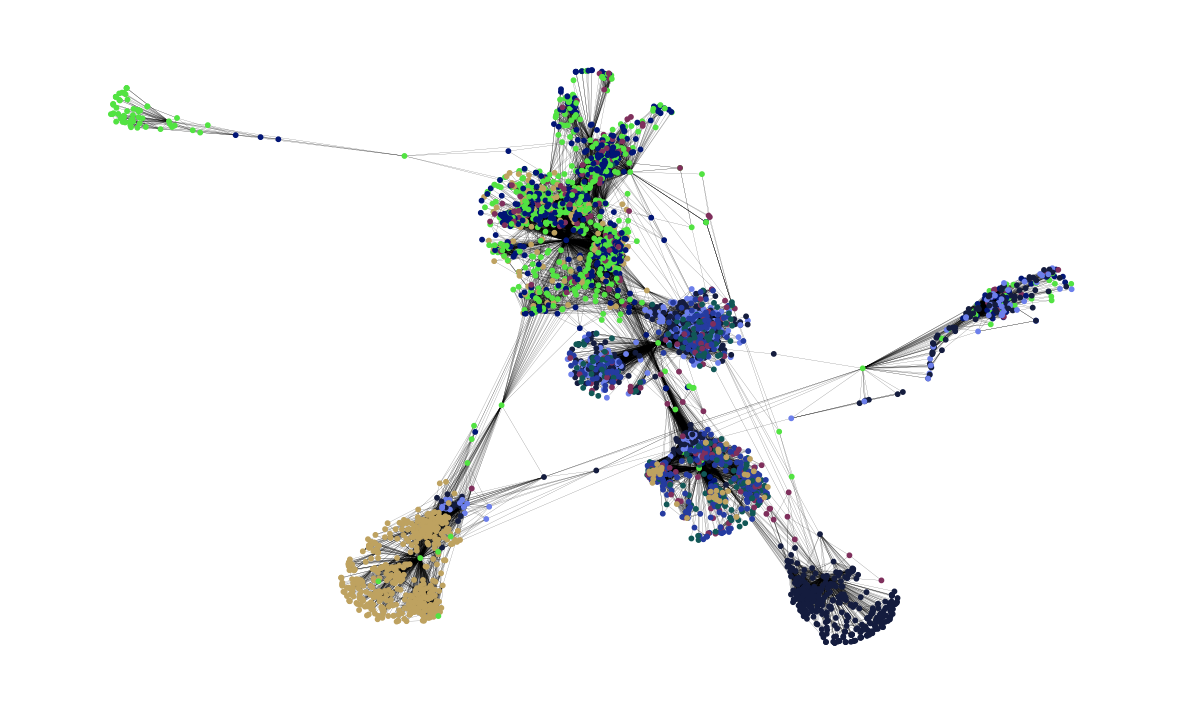

In [25]:
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    G, pos=pos, node_size=10, with_labels=False, width=0.1, node_color=colors
)

In [51]:
times = {
    "lpc": [],
    "luvin": [],
    "fluid10": [],
    "fluid40": []
}

import numpy as np

sizes = np.arange(20000, 90000, 10000)

from time import time

for size in sizes:
    curGraph = nx.from_pandas_edgelist(facebook[:size], "start_node", "end_node")

    start = time()
    nx.community.asyn_lpa_communities(curGraph)
    end = time()

    times["lpc"].append(end - start)

    start = time()
    nx.community.louvain_communities(curGraph)
    end = time()

    times["luvin"].append(end - start)
    
    if (nx.is_connected(curGraph)):    
        start = time()
        nx.community.asyn_fluidc(curGraph, 10)
        end = time()

        times["fluid10"].append(end - start)

        start = time()
        nx.community.asyn_fluidc(curGraph, 40)
        end = time()

        times["fluid40"].append(end - start)
    else:
        times["fluid40"].append(0)
        times["fluid10"].append(0)
    

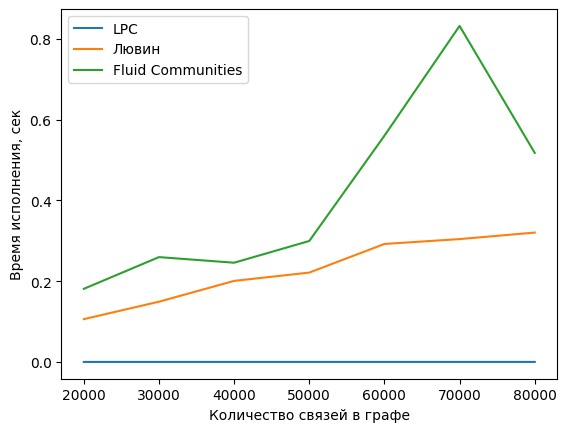

In [52]:
import matplotlib.pyplot as plt

plt.plot(sizes, times["lpc"], label="LPC")
plt.plot(sizes, times["luvin"], label="Лювин")
plt.plot(sizes, times["fluid10"], label="Fluid Communities")

plt.legend()
plt.ylabel("Время исполнения, сек")
plt.xlabel("Количество связей в графе")
plt.show()